In [6]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [15]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']


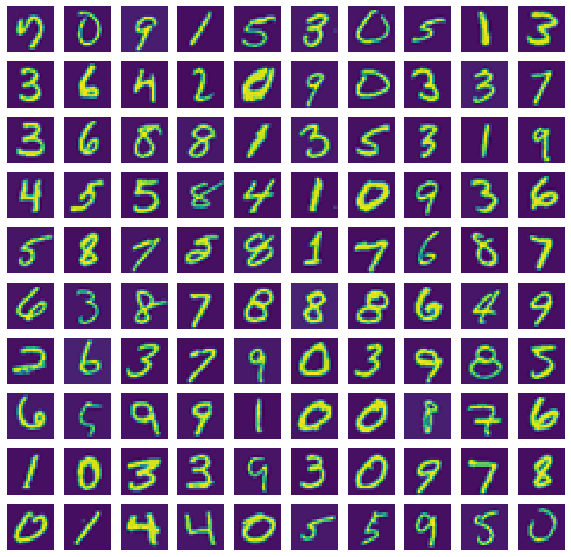

In [9]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
        axarr[i,j].axis('off')     


In [10]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [25]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [26]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [32]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n-1)) #inital parametersfor i in range(k):
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i], 
fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.012647
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.014651
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.060295
         Iterations: 50
         Function evaluations: 147
         Gradient evaluations: 147
         Current function value: 0.073494
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.036661
         Iterations: 50
         Function evaluations: 161
         Gradient evaluations: 161
         Current function value: 0.062285
         Iterations: 50
         Function evaluations: 134
         Gradient evaluations: 134
         Current function value: 0.022440
         Iterations: 50
         Function evaluations: 174
         Gradient evaluations: 174
         Current function value: 0.033601
      

In [37]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

94.64